# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 6- Trees

So far we have only stuied linear data structures such as sequences. In such a data structure there is only one item after a given item. However, in nonlinear data structures such as trees and graphs, each item can have more than one "next" or successor. 

Trees and graphs are extremely important data structures. In this chapter and the next few ones we study basic properties of trees and graphs and some of their applications in computer science. More detailed analysis of graphs is the subject of [Complex Network Theory](https://dreamintelligent.com/wp-content/uploads/2025/03/1-Complex-Network-Analysis-Course-2025-Chapter-1-Introduction.pdf). 


 
Trees can be thought of as an advanced type of linked list in which each item can have multiple `next` pointers.  
The elements of a tree are called its _nodes_.
If a node $v$ has $u$ as one of its nexts, we say $v$ is a _parent_ of $u$ and $u$ is a _child_ of $v$.   
We assume that each node has only one parent. If we relax this condition, the resulting structure is called a _graph_.   
A tree encodes a _hierarchical_ data structure.

Using trees, the Sequence and Set data strctures can have alternative implementations. 

The head of a tree is called its _root_.  

A node that does not have children is called an **leaf**. Otherwise it is an **interior node**.   
The simplest type of tree is a **binary tree** in which each node has _at most_ two children. They are called `left` and `right`. 

For the ease of computation, we keep a pointer to a node's `parent` as well.

Here are two examples of trees: the directory structure of a typical Linux system (top) and the hierarchical structure of a book's contents. 

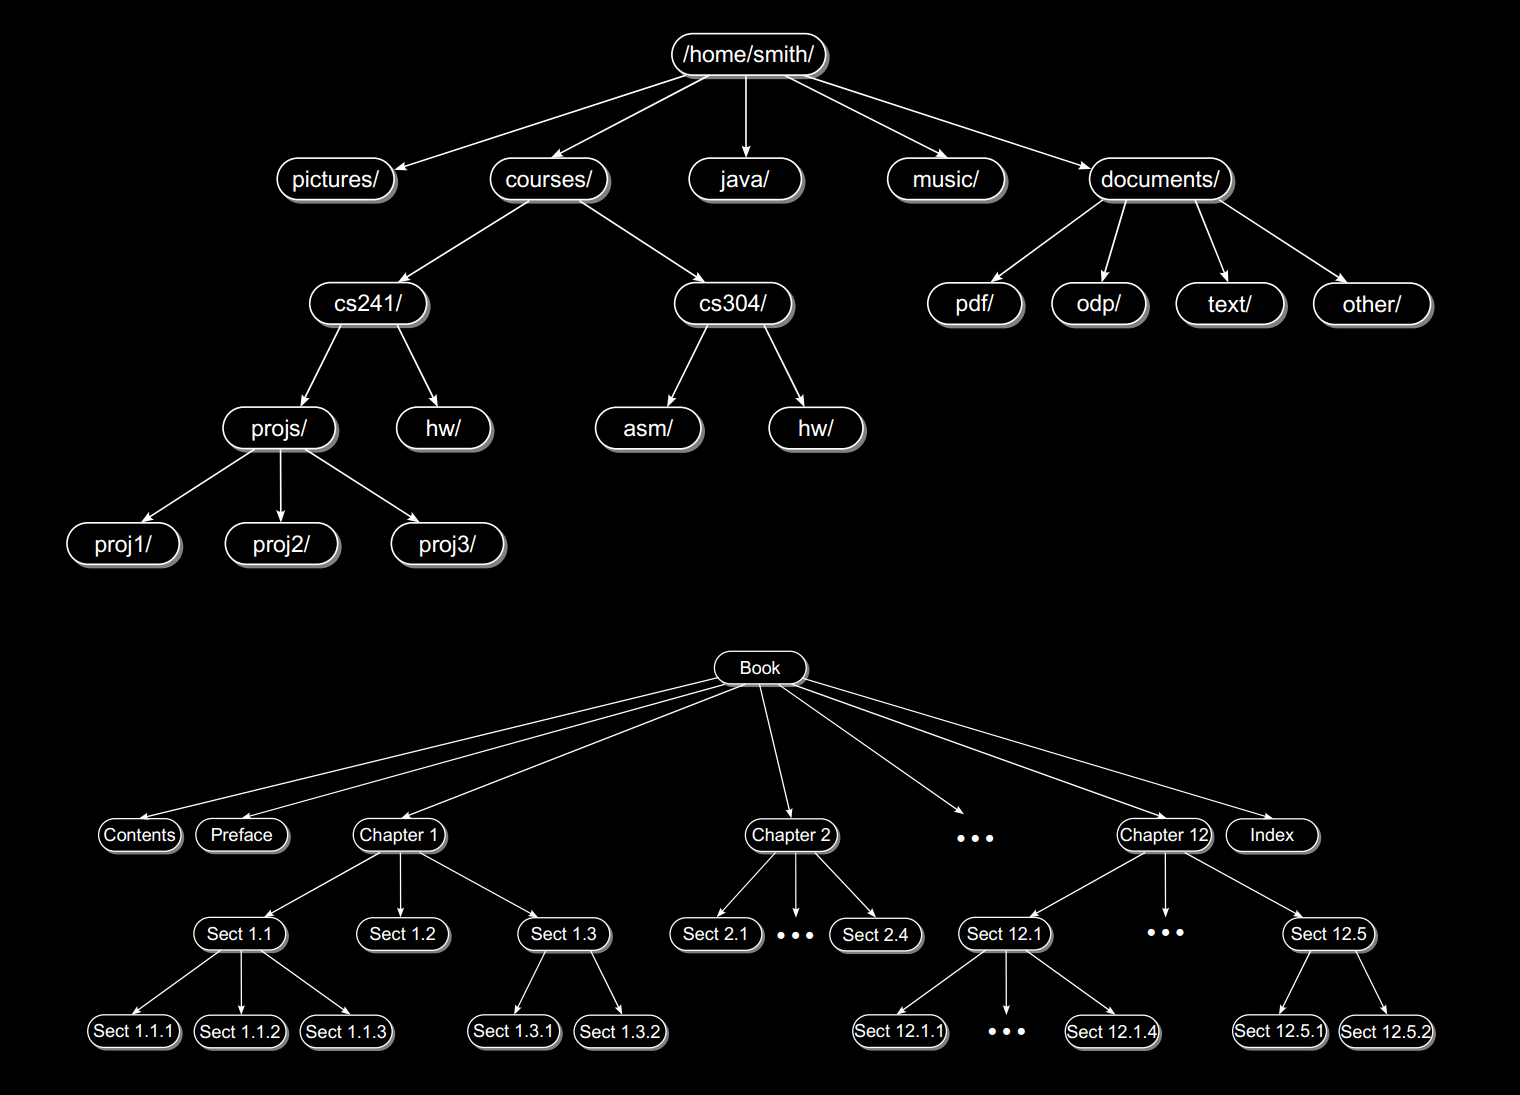

A **path** in a tree (or more generally a graph) is a sequence of nodes $v_1, v_2, \ldots, v_k$ such that $v_{i+1}$ is a child of $v_i$ for $i=2,3,\ldots, k$. The **length** of this path is $k$.  

The **depth** (or _level_) of a node is the length of any path from root to the node. 

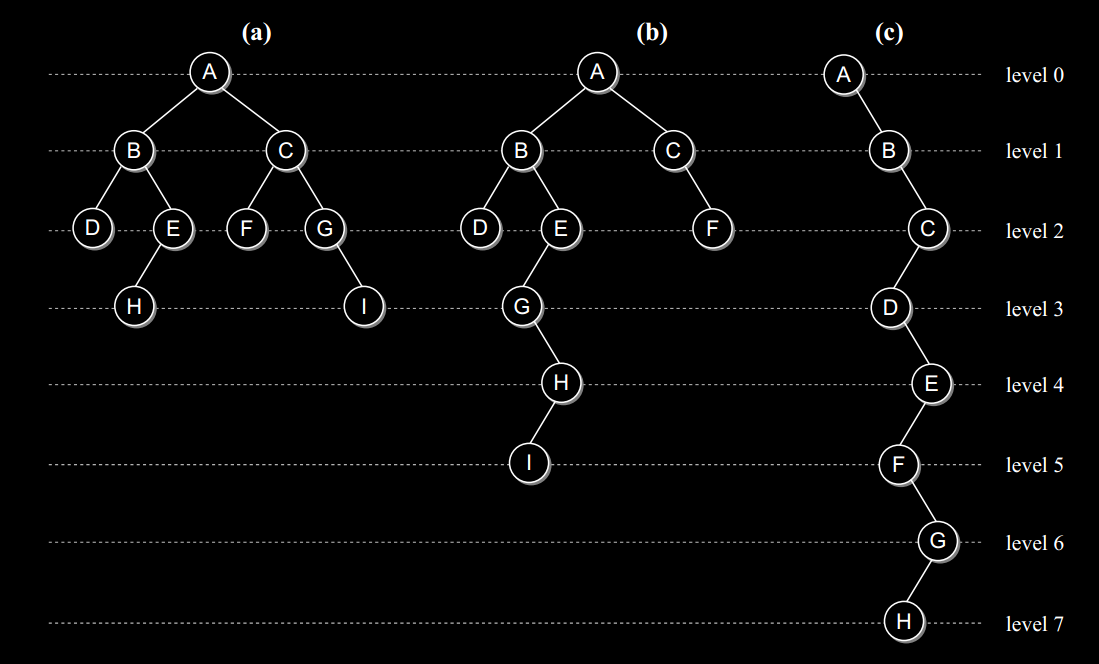

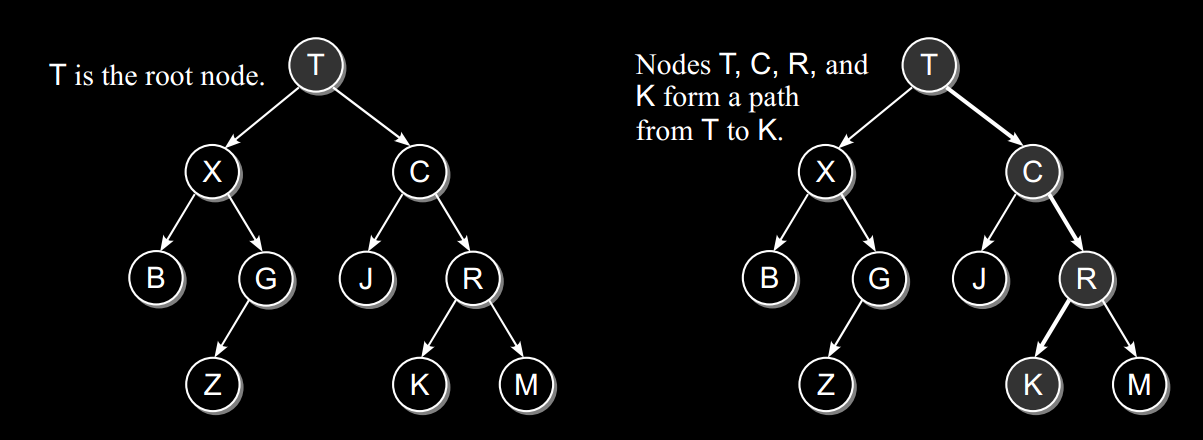

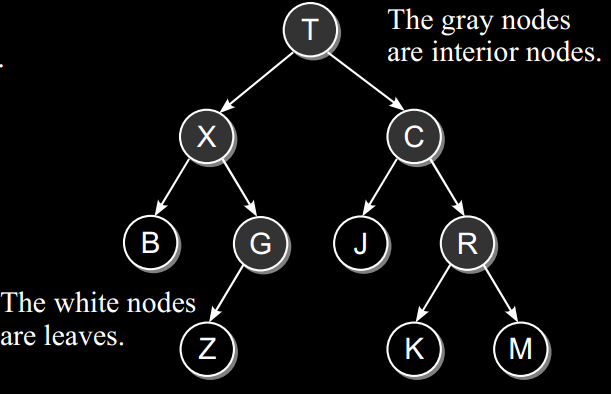

Every node determines a subtree, consisting of its descendants. 
It is the root of its subtree.  

Similarly, in a binary tree, each node has a lefth subtree and a right subtree. 

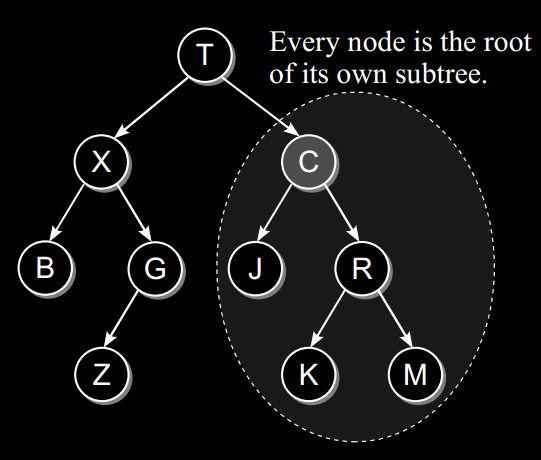


The **height** of a node is the maximum depth of the nodes in its subtree. The height of the tree itself is the height of its root. In the following $h$ denotes the height of the tree.

The **width** of a binary tree is the number of nodes on the level containing the most nodes.

The size of a binary tree is simply the number of nodes in the tree.


The minimum height of a binary tree of size $n$:  when all of the levels are filled to capacity (i.e. $2^i$), except possibly the last one. So the minimum height is $[\log_2 n] + 1$.


As we can see, a linked list is a special case of a binary tree. However in a linked list finding an element is $O(n)$ in the worst case, however a binary tree can be arranged so that no element is farther than $\log n$ from the root. 


## Types of binary tree
A **full binary tree** is a binary tree in which each interior node contains two
children.
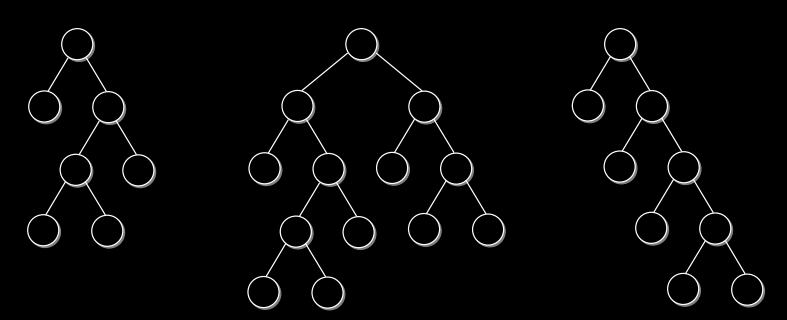

A **perfect binary tree** is a full binary tree in which all leaf nodes are at the
same level.
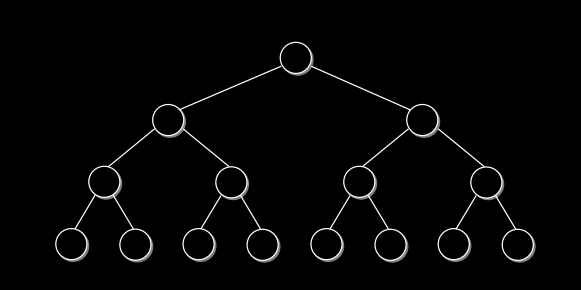


A binary tree of height h is a **complete binary tree** if it is a perfect binary tree
down to height h − 1 and the nodes on the lowest level fill the available slots from
left to right leaving no gaps.

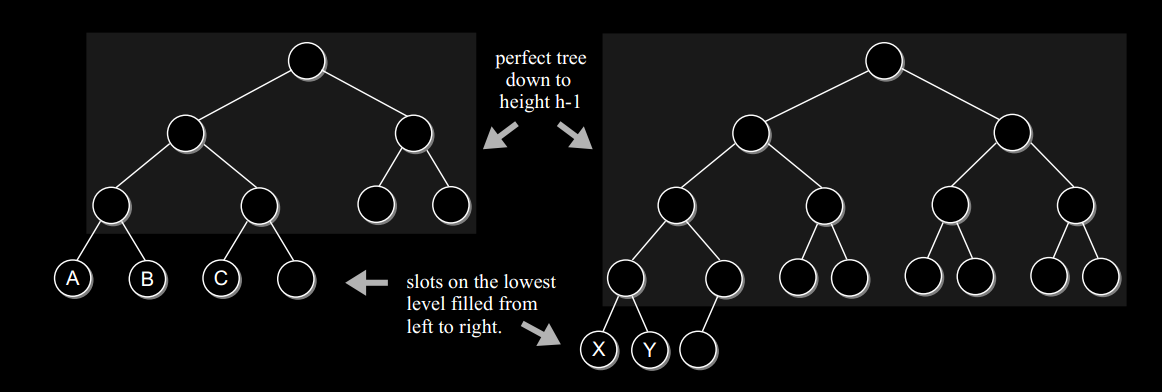

In [ ]:
# The storage class for creating binary tree nodes.
class Binary_Node :
     def __init__( self, data ):
         self.data = data
         self.left = None
         self.right = None
         self.parent= None


# Traversing a tree
As opposed to a sequence, there is no unique way to traverse a tree.

A binary tree has an inherent order:  
For any node $v$, the nodes in the left subtree of $v$ is before $v$, then is $v$ and then the right subtree of $v$. This is called _(inorder) traversal order_.

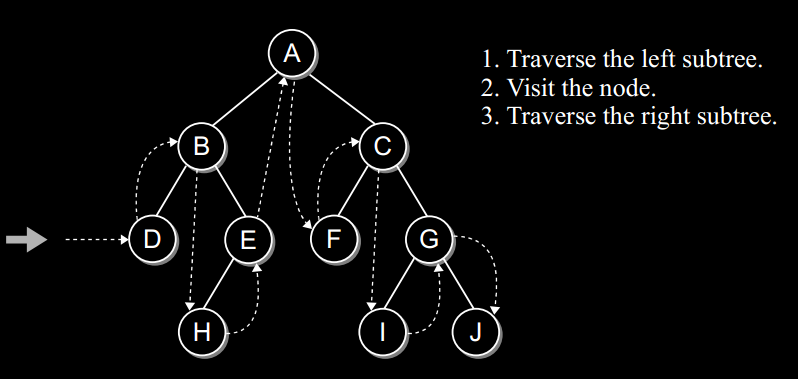

Traversing a binary tree in this way is called **Depth First Search (DFS)**. 

**Exercise:** do the DFS for the three examples of binary trees in the second figure of this notebook and record the order of the visited nodes.

Note: this is also called _inorder_. We can also have _preorder_ ($v$, left subtree, right subtree) and _post order_ (left subtree, right subtree, $v$). 

In [1]:
#Inorder traversal on a binary tree.
def inorderTrav( node ):
     if node is not None :
         if node.left:
            inorderTrav( node.left )
         print( node.data )
        
         if node.right:
            inorderTrav( node.right )




# Dynamic operations

Adding and deleting nodes must preserve traversal order

## Adding a node

To insert a node $B$ before a given node $A$ in the traversal order, either:
-  node $A$ has a left child or not. If $A$ does not have a left child, than we can simply add 
$B$ as the left child of $A$.

Example: inserting G before E:
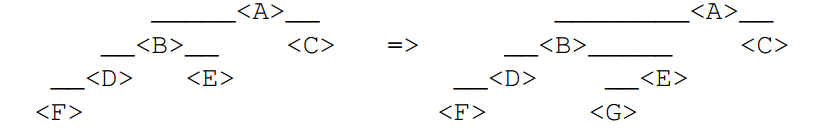

- $A$ has a left child, we can add $B$ as the right child of 
the last node in $A$’s left subtree (which cannot have a right child). 
    O(h) time. 
    
Example: inserting H after A:    
    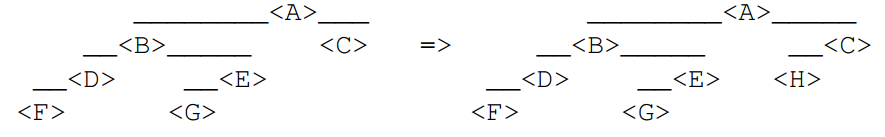

In [ ]:
#Inserting B before A in traversal order
def subtree_insert_before(A, B): # O(h)
    if A.left:
        last = A.left.subtree_last()
        last.right, B.parent = B, last
    else:
        A.left, B.parent = B, A
    # A.maintain() # wait for R07!

#Inserting B after A in traversal order
def subtree_insert_after(A, B): # O(h)
    if A.right:
        A = A.right.subtree_first()
        A.left, B.parent = B, A
    else:
        A.right, B.parent = B, A
    # A.maintain() # wait for next lecture!



## Deleting a node
 If the node is a leaf, then we can clear the 
child pointer from the node’s parent and return the node.   

Example: removing F:
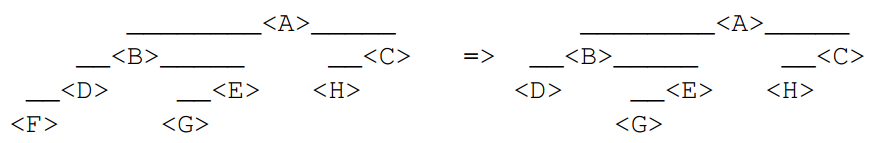

If the node is an interior node, we 
can swap the node’s item with the item in the node’s children down the tree until 
the item is in a leaf which can be removed. Since swapping only occurs down the tree, again this 
operation runs in O(h) time. 

Example: removing A:
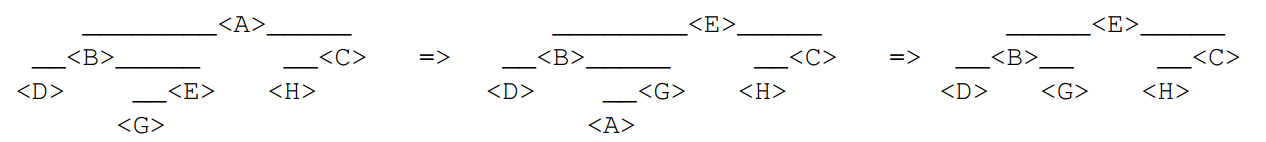

Removing an interior node with one child:
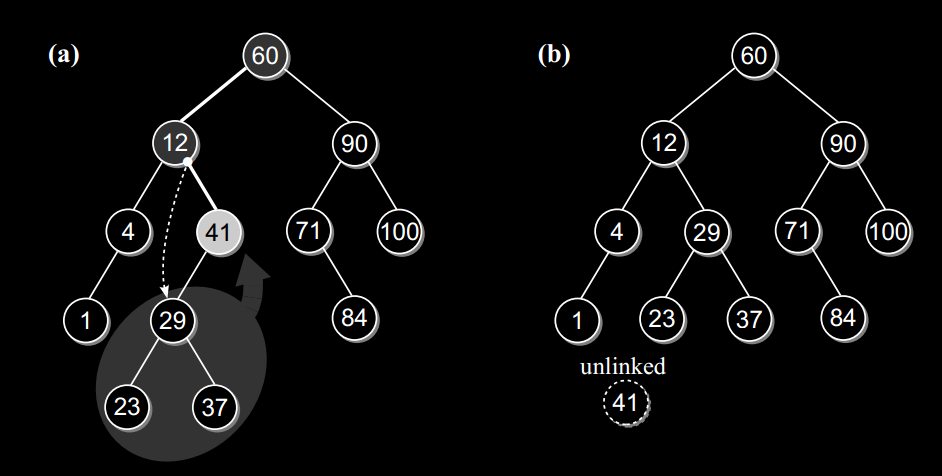

If the node N to be removed has two children then we find its successor S, swap the contents of N and S, and hen remove S from the tree. 

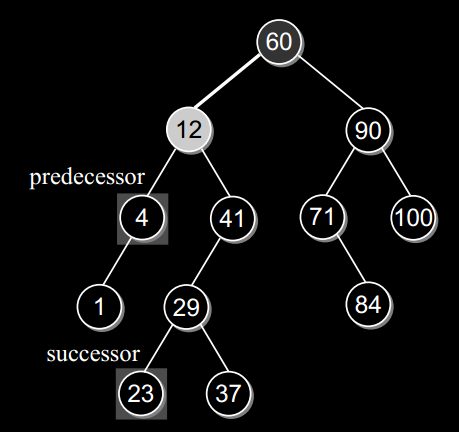

In [ ]:
def subtree_delete(A): # O(h)
    if A.left or A.right: # A is not a leaf
        if A.left: B = A.predecessor()
        else: B = A.successor()
        A.item, B.item = B.item, A.item
        return B.subtree_delete()
    if A.parent: # A is a leaf
        if A.parent.left is A: A.parent.left = None
        else: A.parent.right = None
        # A.parent.maintain() # wait for next lecture!
    return A



In [ ]:
class Binary_Node:
 def __init__(A, x): # O(1)
    A.item = x
    A.left = None
    A.right = None
    A.parent = None
    # A.subtree_update() # wait for next lecture!

 def subtree_iter(A): # O(n)  The same as inorder traversal (DFS)
    if A.left: 
       yield from A.left.subtree_iter()
    
    yield A

    if A.right: 
       yield from A.right.subtree_iter()

def subtree_first(A): # O(h)
    if A.left: return A.left.subtree_first()
    else: return A

def subtree_last(A): # O(h)
    if A.right: return A.right.subtree_last()
    else: return A

def successor(A): # O(h)
    # If A has a right child, then its successor is the first element of its right subtree (in the traversal order)
    if A.right: return A.right.subtree_first()
    
    # Otherwise we go up the tree from A as long as A is the right child of its parent
    while A.parent and (A is A.parent.right):
        A = A.parent
    return A.parent

def predecessor(A): # O(h)
    if A.left: return A.left.subtree_last()
    
    while A.parent and (A is A.parent.left):
        A = A.parent
    
    return A.parent

# Inserts B before A
def subtree_insert_before(A, B): # O(h)
    
    if A.left:
        # B becomes the right child of the predecessor of A
        A = A.left.subtree_last()
        A.right, B.parent = B, A
    else:
        # B becomes the left child of A
        A.left, B.parent = B, A
    # A.maintain() # wait for next lecture!

def subtree_insert_after(A, B): # O(h)
    if A.right:
        A = A.right.subtree_first()
        A.left, B.parent = B, A
    else:
        A.right, B.parent = B, A
    # A.maintain() # wait for next lecture!



def subtree_delete(A): # O(h)  
    # We swap the contents of A with that of its predecessor (or successor, if it doesn't have one) till we reach a leaf
    if A.left or A.right:  # If A is an interior node:
        if A.left: B = A.predecessor()
        else: B = A.successor()
        # We exchange the contents of A and its predecessor (if A has a left child) or its successor (if it doesn't)
        A.item, B.item = B.item, A.item
        # We then delete B
        return B.subtree_delete()
    
    # If A is a leaf, we can simply unlink it from its parent
    if A.parent:
        if A.parent.left is A: 
            A.parent.left = None
        else: 
            A.parent.right = None
        # A.parent.maintain() # wait for next lecture!
    return A



In [ ]:
class Binary_Tree:
    def __init__(T, Node_Type = Binary_Node):
        T.root = None
        T.size = 0
        T.Node_Type = Node_Type

    def __len__(T): return T.size
    def __iter__(T):
        if T.root:
            for A in T.root.subtree_iter():
                yield A.item

# Application: sets

We have already seen 3 implementations of the set abstract data structure: using arrays, sorted arrays and hash tables. Here we see another one using binary trees. In this implementation the traversal order of the binary tree coincides with the order of the elements of the set. 

This is an example of a **Binary Search Tree (BST)** i.e. a binary tree such that the values of the nodes in the left subtree of each node $v$ are smaller than the value of $v$, and the value of $v$ is greater than or equal to the values of the elements on its right subtree.

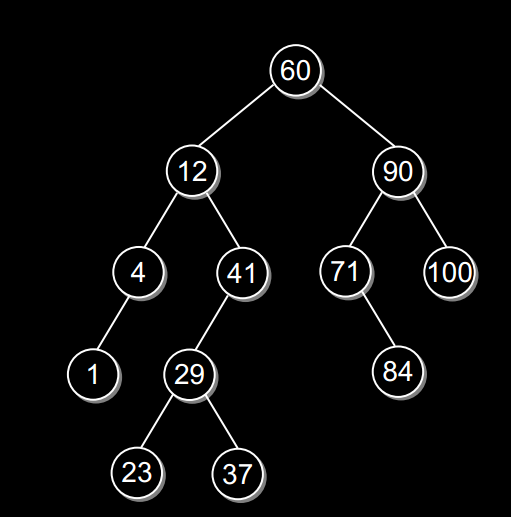

The advantage of this implementation is that: in sorted arrays, insertions are $O(n)$ but in binary trees they can be done in $O(h)$ where $h$ is the height of the tree. Thus, if we have $h=\log n$ then insertions are done in $O(\log n)$. 

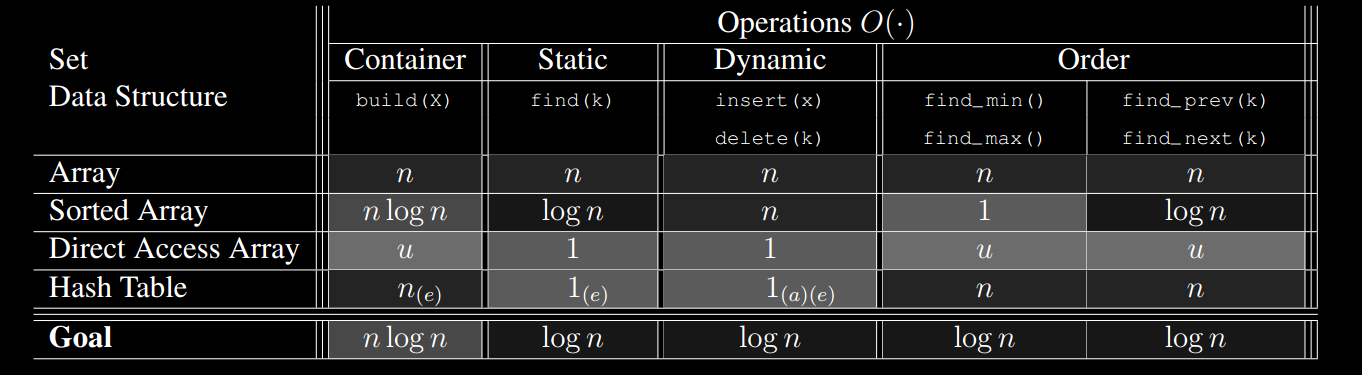


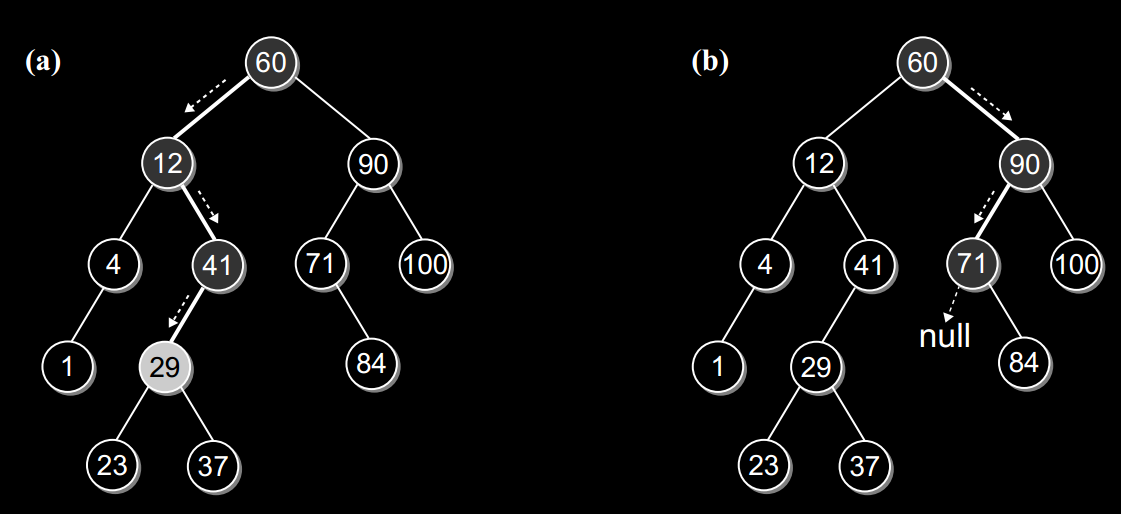

In [ ]:
class BST_Node(Binary_Node): # Binary Search Tree Node
    # All the operations are performed in the subtree of A
    def subtree_find(A, k):  # O(h)
        if k < A.item.key:
            if A.left: return A.left.subtree_find(k)
        elif k > A.item.key:
            if A.right: return A.right.subtree_find(k)
        else: return A
        return None

    def subtree_find_next(A, k): # O(h)
        if A.item.key <= k:
            if A.right: return A.right.subtree_find_next(k)
            else: return None
        elif A.left:
            B = A.left.subtree_find_next(k)
            if B: return B
        return A

    def subtree_find_prev(A, k): # O(h)
        if A.item.key >= k:
            if A.left: return A.left.subtree_find_prev(k)
            else: return None
        elif A.right:
            B = A.right.subtree_find_prev(k)
            if B: return B
        return A
    
    #  Inserts B in the subtree of A
    def subtree_insert(A, B): # O(h)
        if B.item.key < A.item.key:
            if A.left: A.left.subtree_insert(B)
            else: A.subtree_insert_before(B)
        elif B.item.key > A.item.key:
            if A.right: A.right.subtree_insert(B)
            else: A.subtree_insert_after(B)
        else: A.item = B.item

class Set_Binary_Tree(Binary_Tree): # Binary Search Tree
    def __init__(self): super().__init__(BST_Node)
    
    def iter_order(self): yield from self
    
    def build(self, X):
        for x in X: self.insert(x)
    def find_min(self):
        if self.root:    return self.root.subtree_first().item
    def find_max(self):
        if self.root:    return self.root.subtree_last().item
    def find(self, k):
        if self.root:
            node = self.root.subtree_find(k)
            if node: return node.item
    
    def find_next(self, k):
        if self.root:
            node = self.root.subtree_find_next(k)
            if node: return node.item
    def find_prev(self, k):
        if self.root:
            node = self.root.subtree_find_prev(k)
            if node: return node.item
    
    def insert(self, x):
        new_node = self.Node_Type(x)
        if self.root:
               self.root.subtree_insert(new_node)
               if new_node.parent is None: return False
        else:
            self.root = new_node
        self.size += 1
        return True
    
    def delete(self, k):
        assert self.root
        node = self.root.subtree_find(k)
        assert node
        ext = node.subtree_delete()
        if ext.parent is None: self.root = None
        
        self.size -= 1
        return ext.item

# Application: Expression trees

Mathematical expressions can be encoded using a binary tree, in which the interior nodes play the role of the operators and the leaves indicate variables and constants. (Assuming all the operators are binary.)
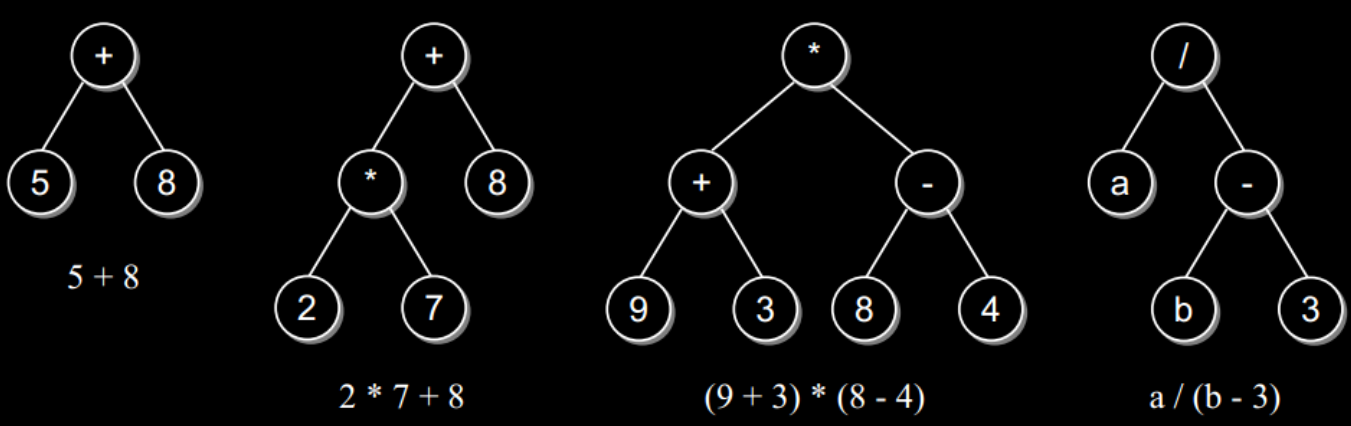

In [1]:
# Storage class for creating the tree nodes.
class _ExpTreeNode :
    def __init__( self, data ):
        self.element = data
        self.left = None
        self.right = None


class ExpressionTree :
    # Builds an expression tree for the expression string.
    def __init__( self, expStr ):
        self._expTree = None
        self._buildTree( expStr ) 
    
    # Evaluates the expression tree and returns the resulting value.
    def evaluate( self, varMap ):
        return self._evalTree( self._expTree, varMap )

    # Returns a string representation of the expression tree.
    def __str__( self ):
        return self._buildString( self._expTree )
        

    
    # Recursively builds a string representation of the expression tree.
    def _buildString( self, treeNode ):
        # If the node is a leaf, it's an operand.
        if treeNode.left is None and treeNode.right is None :
            return str( treeNode.element )
        else : # Otherwise, it's an operator.
            expStr = '('
            expStr += self._buildString( treeNode.left )
            expStr += str( treeNode.element )
            expStr += self._buildString( treeNode.right )
            expStr += ')'
            return expStr

    def _evalTree( self, subtree, varDict ):
        # See if the node is a leaf node, in which case return its value.
        if subtree.left is None and subtree.right is None :
            # Is the operand a literal digit?
            #if subtree.element >= '0' and subtree.element <= '9' :
            if subtree.element.isdigit():
                return int(subtree.element)
            else : # Or is it a variable?
                assert subtree.element in varDict, "Invalid variable."
                return varDict[subtree.element]

        # Otherwise, it's an operator that needs to be computed.
        else :
            # Evaluate the expression in the left and right subtrees.
            lvalue = _evalTree( subtree.left, varDict )
            rvalue = _evalTree( subtree.right, varDict )
            # Evaluate the operator using a helper method.
            return _computeOp( lvalue, subtree.element, rvalue )

    # Compute the arithmetic operation based on the supplied op string.
    def _computeOp( left, op, right ):
        return


_evalStr
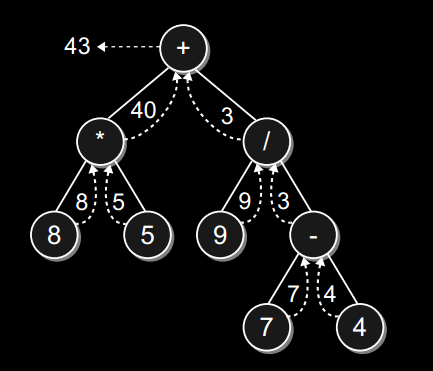

## Building the tree from infix
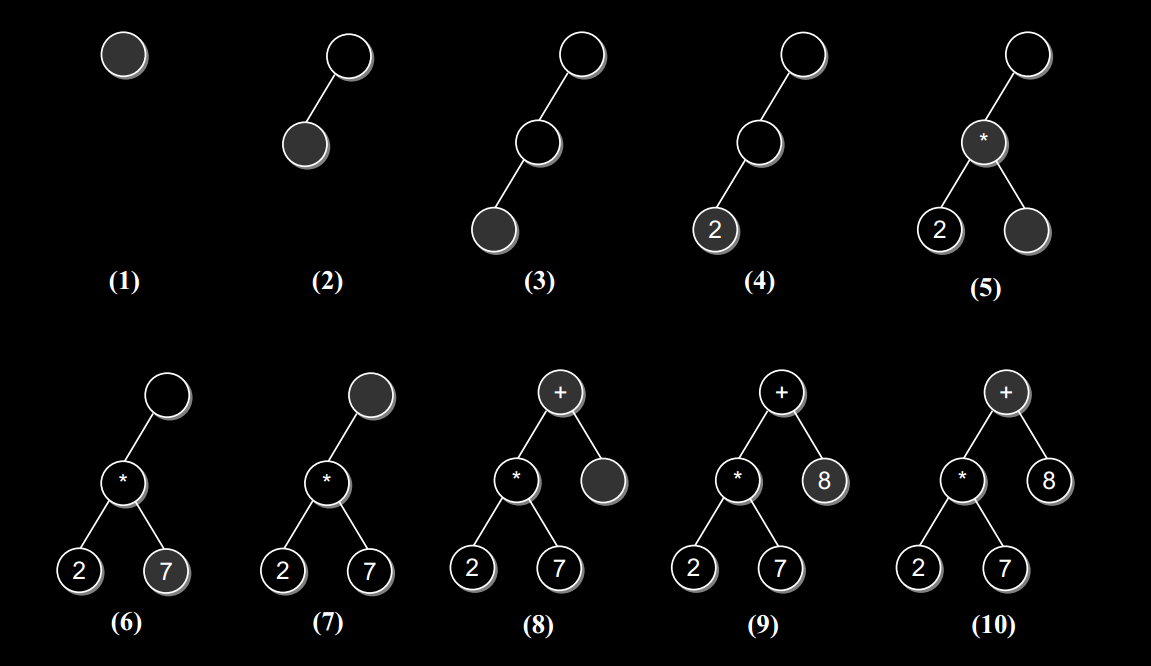

In [10]:
class ExpressionTree :

    def _buildTree( self, expStr ):
        # Build a queue containing the tokens in the expression string.
        expQ = Queue()
        for token in expStr :
            expQ.enqueue( token ) 
            # Create an empty root node.
            self._expTree = _ExpTreeNode( None )
            # Call the recursive function to build the expression tree.
            self._recBuildTree( self._expTree, expQ )

    # Recursively builds the tree given an initial root node.
    def _recBuildTree( self, curNode, expQ ):
        # Extract the next token from the queue.
        token = expQ.dequeue()

        # See if the token is a left paren: '('
        if token == '(' :
            curNode.left = _ExpTreeNode( None )
            self._buildTreeRec( curNode.left, expQ )

            # The next token will be an operator: + - /*%
            curNode.element = expQ.dequeue()
            curNode.right = _ExpTreeNode( None )
            self._buildTreeRec( curNode.right, expQ )

            # The next token will be a ), remove it.
            expQ.dequeue()

        # Otherwise, the token is a digit that has to be converted to an int.
        else :
            curNode.element = token



# Exercises
1- Given a binary tree of size 76, what is the minimum and maximum number of levels it can
contain? 

2- Draw all possible binary trees that contain 12 nodes.

3- Given the following binary trees: 

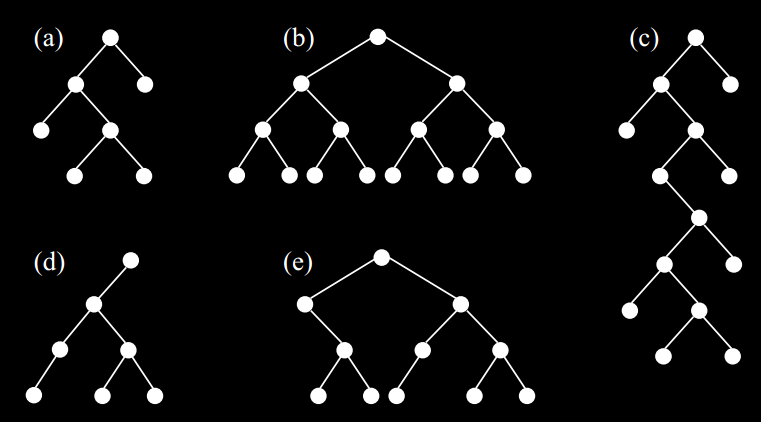

(a) Indicate all of the structure properties that apply to each tree: full, perfect,
complete.  
(b) Determine the size of each tree.  
(c) Determine the height of each tree.  
(d) Determine the width of each tree.  

4- Determine the order in which the nodes of the following tree will be traversed in traversal order.

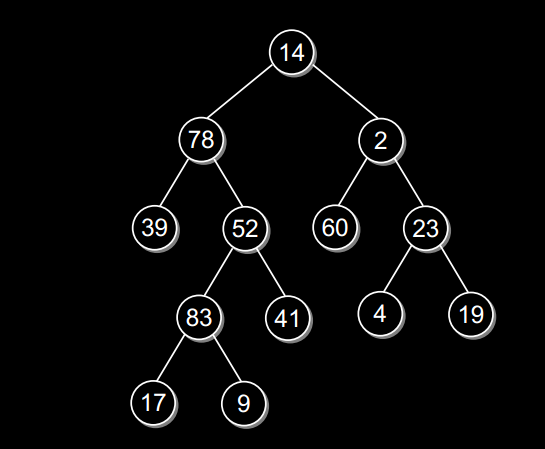


5- Prove that the `successor` function for binary trees always returns the successor of the node in the traversal order. (Hint: use induction on the depth of the node.)

6- Prove that after invoking the `delete_node` function, the traversal order stays the same, except for the removal of the node. 